<a href="https://colab.research.google.com/github/SundariReddy/CE888-1/blob/master/lab5/bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our actions

def action_0():
    return np.random.choice([1, 0], p=[0.5, 0.5])

def action_1():
    return np.random.choice([1, 0], p=[0.6, 0.4])

def action_2():
    return np.random.choice([1, 0], p=[0.2, 0.8])

rewards = [action_0, action_1, action_2]

In [3]:
for i in range(10):
    print('Pull %d (action_0): reward=%d' % (i, rewards[0]()))

Pull 0 (action_0): reward=1
Pull 1 (action_0): reward=1
Pull 2 (action_0): reward=1
Pull 3 (action_0): reward=1
Pull 4 (action_0): reward=0
Pull 5 (action_0): reward=1
Pull 6 (action_0): reward=0
Pull 7 (action_0): reward=1
Pull 8 (action_0): reward=1
Pull 9 (action_0): reward=1


In [4]:
# Simulate action values (Q): expected reward for each action
pulls = 100000

action_values = []
for reward in rewards:
    value = [reward() for _ in range(pulls)]  # execute each of the actions 'pulls' times
    action_values.append(value)

for action, value in enumerate(action_values):
    print("Action %d: Q(a_%d)=%.2f" % (action, action, np.mean(value)))

Action 0: Q(a_0)=0.50
Action 1: Q(a_1)=0.60
Action 2: Q(a_2)=0.20


In [5]:
# To simulate the values (V), we need to define a policy
# (Value is the expected reward given the policy I'm following)

# Define a policy:
def policy_random():
    '''Returns which action to perform using equal probabilities for each action'''
    return np.random.choice([0, 1, 2], p=[1/3, 1/3, 1/3])


def policy_better():
    ''' A better policy than random: we choose actions 0 and 1 more often than action 2'''
    return np.random.choice([0, 1, 2], p=[0.4, 0.5, 0.1])


In [6]:
# Simulate Values using the random policy
total_reward = 0
for pull in range(pulls):
    action = policy_random()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 43129
Average reward: V = 0.43129


In [7]:
# Simulate Values using the better policy
total_reward = 0
for pull in range(pulls):
    action = policy_better()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 52183
Average reward: V = 0.52183


In [8]:
# Regret of the better policy
V_star = max([np.mean(value) for value in action_values])
print("V* =", V_star)

total_regret = 0
for pull in range(pulls):
    total_regret += (V_star - rewards[policy_better()]())
print('Regret: I_t = %.2f' % (total_regret/pulls))

V* = 0.59981
Regret: I_t = 0.08


In [9]:
# Some bandit policies to explore:

def policy_greedy(action_values):
    '''Always returns the action for which the payoff is highest'''
    best_action = np.argmax([np.mean(value) for value in action_values])
    return best_action


def policy_e_greedy(action_values, epsilon=0.05):
    '''We explore with epsilon probability, and choose the best action the rest of the time'''
    explore = np.random.choice([1, 0], p=[epsilon, 1-epsilon])
    if explore:
        # Random action
        return policy_random()
    else:
        # Choose best action
        return policy_greedy(action_values)



In [10]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class DecayingEGreedy:
    
    def __init__(self, epsilon, decay=0.99, lower_bound=0):
        self.epsilon = epsilon
        self.decay = decay
        self.lower_bound = lower_bound
        
    def policy(self, action_values):
        if self.lower_bound > 0 and self.epsilon > self.lower_bound:
            self.epsilon *= self.decay  # update epsilon
        explore = np.random.choice([1, 0], p=[self.epsilon, 1-self.epsilon])  # explore vs exploit decision
        if explore:
            # Random action
            return policy_random()
        else:
            # Choose best action
            return policy_greedy(action_values)


In [11]:
# Let's test the decaying epsilon-greedy approach
agent = DecayingEGreedy(epsilon=0.1, decay=0.99, lower_bound=0.03)

# Full problem:
action_values = [[], [], []] # initialise values
rewards_decaying_e_greedy = []
total_reward = 0
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_decaying_e_greedy.append(total_reward/pull)



Number of pulls		Total reward		V
1000			574			0.575


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2000			1160			0.580
3000			1740			0.580
4000			2352			0.588
5000			2948			0.590
6000			3533			0.589
7000			4128			0.590
8000			4724			0.591
9000			5298			0.589
10000			5899			0.590
11000			6490			0.590
12000			7080			0.590
13000			7700			0.592
14000			8272			0.591
15000			8894			0.593
16000			9479			0.592
17000			10075			0.593
18000			10671			0.593
19000			11252			0.592
20000			11863			0.593
21000			12471			0.594
22000			13052			0.593
23000			13631			0.593
24000			14235			0.593
25000			14847			0.594
26000			15466			0.595
27000			16053			0.595
28000			16637			0.594
29000			17225			0.594
30000			17794			0.593
31000			18351			0.592
32000			18955			0.592
33000			19552			0.593
34000			20174			0.593
35000			20786			0.594
36000			21380			0.594
37000			21944			0.593
38000			22540			0.593
39000			23149			0.594
40000			23756			0.594
41000			24362			0.594
42000			24966			0.594
43000			25545			0.594
44000			26142			0.594
45000			26756			0.595
46000			27358			0.595
47000			27944			0.595
48000			285

Text(0, 0.5, 'Average reward (V)')

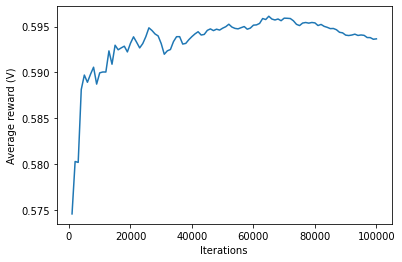

In [12]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_decaying_e_greedy)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")
# The average reward is 0.594, which is very close to V* (0.6)!

In [13]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class UCB:
    
    def __init__(self, C=0.5, n_arms=3):
        self.C = C
        self.pulls = 0
        self.counts = np.asarray([0] * n_arms)
        
    def update_counts(self, arm):
        self.pulls += 1
        self.counts[arm] += 1
        
    def policy(self, action_values):
        action_values = np.asarray([np.mean(value) for value in action_values])
        uncertainty = np.sqrt(np.log(self.pulls) / self.counts)
        ucb = action_values + self.C * uncertainty
        action = np.argmax(ucb)
        self.update_counts(action)
        return action


In [14]:
# Let's test the decaying epsilon-greedy approach
agent = UCB(C=0.5)

# Full problem:
action_values = [[], [], []] # initialise values
total_reward = 0 # reset reward
rewards_ucb = []
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_ucb.append(total_reward/pull)


Number of pulls		Total reward		V
1000			589			0.590


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


2000			1179			0.590
3000			1772			0.591
4000			2350			0.588
5000			2958			0.592
6000			3547			0.591
7000			4167			0.595
8000			4774			0.597
9000			5398			0.600
10000			6008			0.601
11000			6586			0.599
12000			7166			0.597
13000			7757			0.597
14000			8341			0.596
15000			8926			0.595
16000			9527			0.595
17000			10120			0.595
18000			10704			0.595
19000			11284			0.594
20000			11882			0.594
21000			12478			0.594
22000			13062			0.594
23000			13668			0.594
24000			14282			0.595
25000			14891			0.596
26000			15492			0.596
27000			16108			0.597
28000			16711			0.597
29000			17314			0.597
30000			17924			0.597
31000			18555			0.599
32000			19170			0.599
33000			19750			0.599
34000			20340			0.598
35000			20951			0.599
36000			21526			0.598
37000			22122			0.598
38000			22740			0.598
39000			23352			0.599
40000			23959			0.599
41000			24567			0.599
42000			25126			0.598
43000			25720			0.598
44000			26294			0.598
45000			26889			0.598
46000			27469			0.597
47000			28065			0.597
48000			286

Text(0, 0.5, 'Average reward (V)')

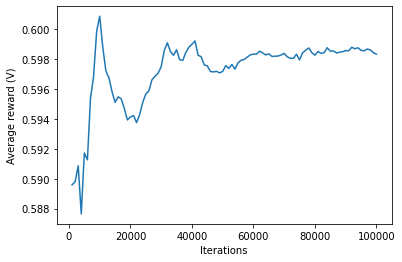

In [15]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_ucb)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")